# Análise de Cartão de Crédito

In [1]:
import pandas as pd

dataframe = pd.read_csv('./datasets/CC GENERAL.csv')
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


## Verificação e preenchimento de valores faltantes

In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)

In [4]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


## Normalização de Dados

In [5]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## Treinamento do KMeans

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
print(y_pred)

[1 0 1 ... 1 1 3]


## Métricas de Validação

Externas:

- Acurácia
- Precisão
- Recall
- F1
- AUC

Internas:

- Cross Validation
- Curva de Aprendizado
- Matriz de Confusão
- Curva ROC

## Critérios de Validação:

Compactação: Quão próximos estão os pontos em um mesmo cluster.
Separação: Quão distantes estão os pontos de clusters diferentes.


## Coeficiente de Silhueta:

alpha: distância média entre um ponto e todos os outros pontos no mesmo cluster
beta: distância média entre um ponto e todos os outros pontos no cluster mais próximo

s = (beta - alpha) / max(alpha, beta)

s = 1 -> melhor
s = -1 -> pior

In [7]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36450360640080837


## Índice de Davies-Bouldin:

Mede a similaridade entre os clusters.

soma das distâncias médias entre os pontos de um cluster e o centro do cluster, dividido pela distância entre os centros dos clusters

$$DB = (1/n) * sum(max((s_i + s_j) / d(c_i, c_j)))$$

s_i = distância média entre os pontos de um cluster e o centro do cluster
d(c_i, c_j) = distância entre os centros dos clusters

- DB = 0 -> melhor
- DB = inf -> pior


In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075784077836666


## Índice Calinski-Harabasz:

Mede a separação entre os clusters.

$$S = (tr(B_k) / tr(W_k)) * ((n - k) / (k - 1))$$

tr(B_k) = traço da matriz de dispersão entre clusters

$$B_k = (n - k) * sum((c_i - c) * (c_i - c)^T)$$

tr(W_k) = traço da matriz de dispersão intra-cluster

$$W_k = sum(sum((x - c_i) * (x - c_i)^T))$$

- S = inf -> melhor
- S = 0 -> pior
 

In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7942608655876


## Validação Relativa:

Comparação entre diferentes números de clusters.

In [10]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    y_pred = kmeans.fit_predict(dataset)

    labels = kmeans.labels_
    
    silhouette = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return silhouette, dbs, calinski

In [11]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32725336851623266 1.3088971675061216 3526.442925405916


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36443927743081506 1.0758787031571042 3431.782548172111


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print(s3, dbs3, calinski3)

0.2970114489197296 1.2084375711747013 2396.7961215210353


In [14]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [15]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03957165440593224 3.5073457947874127 302.1800213539962
0.36443927743081506 1.0758787031571042 3431.782548172111


## Validar a Estabilidade:

In [16]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.056334697944936 1204.111582769171
0.3533093838590228 1.142502270067299 1194.9475421190978
0.3668693099665975 1.1000994536694708 1167.5275312977556


## Visualização dos Clusters:

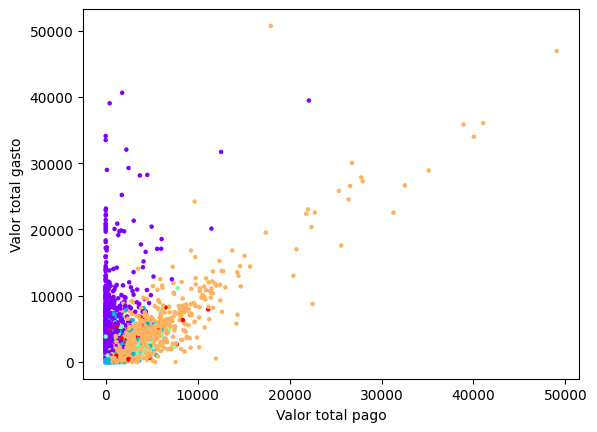

In [17]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

In [18]:
import seaborn as sns

dataframe['cluster'] = labels
# sns.pairplot(dataframe[0:], hue='cluster')

In [19]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.637544  1983.094646   0.000000   506.925348   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3        1538.0  1143.712630  1664.669654   0.000000   212.513230   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2316.353276  14581.459140            1072.0  0.862113   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3         555.745265  1371.943854  19043.138560            1538.0  0.928255   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       886.834603  21235.065300           1072.0  0.117280   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...      1330.437428   8345.641905           2648.0  0.001800   
3        ...       524.765832  18621.013310           1538.0  0.278149   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186888  0.0  0.0  0.083333  0.142857  1.0  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.023264  0.0  0.0  0.000000  0.000000  0.6  
3        0.366934  0.0  0.0  0.083333  0.545455  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [20]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35417892e-01 2.16635031e-04 6.01593847e-02 3.41108036e-02
  2.60537957e-02 4.00438484e-01 5.27178877e-05 2.04676638e-05
  3.52785951e-05 6.55507889e-05 1.57259277e-03 1.12193031e-03
  5.35208153e-01 5.97633409e-01 1.04565201e-01 2.77429650e-05]
 [6.90073361e-02 2.30766891e-04 1.21550029e-01 4.79648309e-02
  7.36854877e-02 2.41461968e-02 1.72963518e-04 3.36841615e-05
  1.40413929e-04 7.90653807e-06 1.23534853e-04 2.86549943e-03
  9.43618663e-01 1.53799518e-01 5.68479389e-02 7.61957975e-05]
 [5.04066658e-01 2.72236202e-04 6.17477717e-02 3.62521558e-02
  2.55173208e-02 2.52821992e-01 6.72498158e-05 2.56940719e-05
  4.50069391e-05 5.74096775e-05 1.15644083e-03 1.33046238e-03
  7.19362473e-01 1.66151447e-01 1.79117805e-01 5.52095138e-07]
 [1.59893172e-01 2.45101382e-04 4.38385714e-01 2.57205740e-01
  1.81351596e-01 2.60404572e-02 2.04213900e-04 8.90367629e-05
  1.50434389e-04 9.40165310e-06 1.70436759e-04 6.17221746e-03
  6.03815441e-01 4.02876087e-01 8.52134751e-02 7.19112993e-05]
 [3.

In [21]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "{:.4f}".format(centroids[:, i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279
MINIMUM_PAYMENTS 0.0542
PRC_FULL_PAYMENT 0.0000


In [22]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [23]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1072.0,0.117280,0.186888,0.0,0.0,0.083333,0.142857,1.0
1,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1538.0,0.278149,0.366934,0.0,0.0,0.083333,0.545455,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
